In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score

%matplotlib inline

In [3]:
# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

In [4]:
# Columns contain the data headers and responses contains the actual data
# columns = pd.read_csv(r'/Users/jaimin/Documents/Kaggle/young-people-survey/columns.csv')
# young = pd.read_csv(r'/Users/jaimin/Documents/Kaggle/young-people-survey/responses.csv')

columns = pd.read_csv(r'C:\Users\jmpl\Documents\Data_Science\Kaggle\young-people-survey\columns.csv')
young = pd.read_csv(r'C:\Users\jmpl\Documents\Data_Science\Kaggle\young-people-survey\responses.csv')

In [5]:
young.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

In [12]:
print(young['Age'].mean())
print(young['Age'].std())

20.43143143143143
2.825423701188111


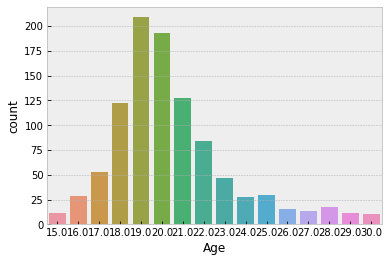

In [8]:
sns.countplot(young['Age'])

In [9]:
# Distinguish young and old from and less 20 and over 20
# Looking for inferences which distinguish the young generation (< 20) and the older generation (>= 20)
# Expecting differences to be around social behaviour: partying & socialising etc., Smoking & Drinking, No. of friends. Mood changes., Different spending habits, education level received

print(len(young['Gender']))

1006


In [17]:
# Age either younger than 20 or 20 or over
young['Under 20'] = np.where(young['Age'] < 20, 'Younger', 'Older') 

print(young['Under 20'].head())

# seriesObj = young.apply(lambda x: True if x['Age'] > 19 else False, axis = 1)

num_under20 = len(young['Under 20'][young['Under 20'] ==  'Younger'].index)
print(num_under20)

num_over20 = len(young['Under 20'][young['Under 20'] ==  'Older'].index)
print(num_over20)

0      Older
1    Younger
2      Older
3      Older
4      Older
Name: Under 20, dtype: object
424
582


In [28]:
var_of_interest = 'Under 20'
mapping = {var_of_interest: {'Younger': 0, 'Older': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young["all"] = ""



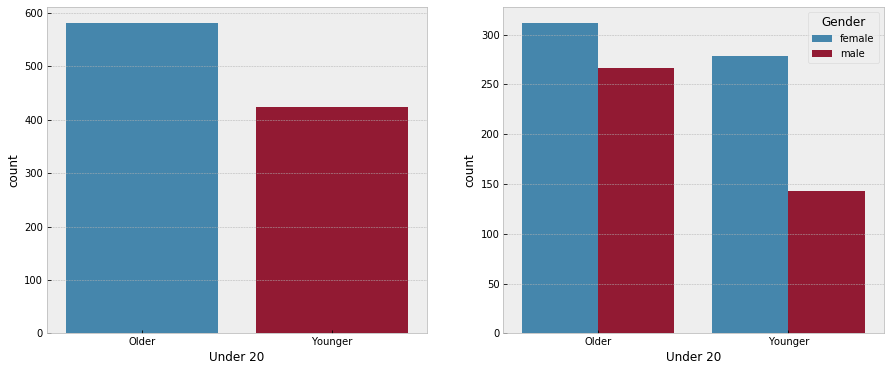

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
sns.countplot(x = var_of_interest, data = young, ax = ax[0])
sns.countplot(x = var_of_interest, hue = 'Gender' , data = young, ax = ax[1])


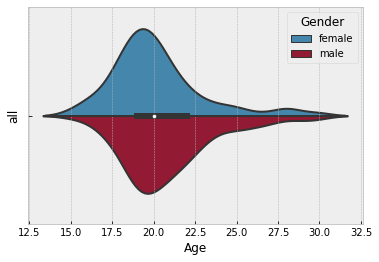

In [44]:
# Looking at the difference in proportion of male and femaile for the age groups

data = young
sns.violinplot(x = 'Age', y = 'all', hue = 'Gender', data = data, split = True)